In [1]:
import h5py
filename = 'data/data_val.h5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

Keys: [u'data_val']


In [2]:
data = list(f[a_group_key])

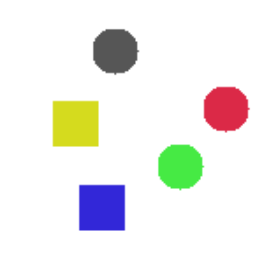

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
# Example Data Point

plt.imshow(data[0] / 255)
plt.axis('off')
plt.show()

In [8]:
from torch.utils.data import DataLoader
import util
reload(util)

from torchvision import transforms
img_transform = transforms.Compose([
#     transforms.Resize(64),
    transforms.ToTensor(),
#     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
    
data_train = util.NotSoCLEVRDataset(csv_file='data/data_val.csv',
                                    img_file=data,
                                    transform=img_transform)

train_loader = DataLoader(data_train, batch_size=64, 
                          shuffle=True, num_workers=4)

In [59]:
import model
reload(model)
from sklearn.metrics import accuracy_score

model_ = model.RelationalNetwork()
import torch

num_epochs = 10
loss_history = []
freq = 20

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for n_batch, batch in enumerate(train_loader):
        images = batch['image']
        tasks = torch.stack(batch['question']).t().float()
        target = batch['answer']
        loss, preds = model_.train(images, tasks, target)
        
        # print statistics
        running_loss += loss.item()
        print loss.item(), accuracy_score(preds, target)
        if n_batch % freq == freq-1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, n_batch + 1, running_loss / freq))
            loss_history.append(running_loss / freq)
            running_loss = 0.0
        
plt.plot(loss_history)
plt.show()

46.2080535889 0.09375
44.4052696228 0.078125
27.7515792847 0.09375
27.9677696228 0.078125
29.5735454559 0.09375
29.4348564148 0.109375
20.358663559 0.09375
23.9657363892 0.09375
21.9027671814 0.0625
20.9726486206 0.09375
18.0246677399 0.125
16.9020938873 0.09375
15.0277462006 0.046875
15.2072620392 0.140625
12.6356086731 0.109375
12.0303611755 0.0625
11.1398515701 0.078125
10.3931436539 0.0625
9.37352561951 0.171875
9.03462219238 0.078125
[1,    20] loss: 0.211
6.95940446854 0.140625
7.7902712822 0.125
6.97225379944 0.171875
6.11960268021 0.125
6.0142416954 0.078125
6.5498790741 0.125
4.2960767746 0.1875
5.18265247345 0.125
4.51723384857 0.203125
4.95631599426 0.109375
4.67266273499 0.109375
4.07819843292 0.203125
4.12189435959 0.1875
3.93018174171 0.25
4.42157173157 0.171875
3.58710241318 0.21875
3.1191072464 0.25
3.19751501083 0.296875
2.535405159 0.34375
3.8116812706 0.125
[1,    40] loss: 0.048
2.62228536606 0.234375
2.94920110703 0.21875
2.3721575737 0.3125
2.96331572533 0.203125


Process Process-200:
Process Process-197:
Process Process-198:
Process Process-199:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/adrianedu/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/Users/adrianed

KeyboardInterrupt: 

In [73]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [82]:
a = ['right', 'blue', 'circle', 'left', 'bottom', 'yellow', 'square',
       'green', 'red', 'top', 'gray']

lb.fit_transform(a)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [80]:
pd.read_csv('data/data_train.csv').answer.unique()

array(['right', 'blue', 'circle', 'left', 'bottom', 'yellow', 'square',
       'green', 'red', 'top', 'gray'], dtype=object)

In [94]:
lb.transform(['yellow'])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [95]:
from util import lb

In [97]:
lb.transform(['yellow'])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])